Crack this Business Problem

Renting a house or an apartment is never easy. Whether you are a college student or a working professional, renting a place always seems like a daunting task that is often impulsive or risky. Rent is influenced by several factors.

In this challenge, participants will predict the house-rents using data science methods, machine learning, and hyperparameter tuning.

The challenge will start on May 12, 2022 and run till May 31, 2022. 



In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [106]:
train=pd.read_csv('train.csv')
train.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0


In [107]:
test=pd.read_csv('test.csv')

In [108]:
test.shape,train.shape

((57722, 21), (134683, 21))

In [109]:
# base model
# regression -null model

In [110]:
train.price.mean()

36690.033894403896

In [111]:
test['price']=train.price.mean()
solution=pd.DataFrame({'price':test.price})

In [112]:
# export the data outside
solution.to_csv('Basemodel.csv',index=False) # RMSE

In [113]:
test=test.drop('price',axis=1)

In [114]:
# combined the data and start the eda


In [115]:
combined=pd.concat([train,test],ignore_index=True)

In [116]:
combined.shape

(192405, 21)

In [117]:
# univariate ana
# bivariate ana
# check the missing value
# if needed we will scale the data
# feTature engineering
# model-building-linear model,Decision tree,random forest

In [118]:
combined.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
price               57722
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
dtype: int64

In [119]:
# num variables
combined.select_dtypes(include=np.number)

,Property_ID,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,33624.0,1312,2,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,9655.0,1474,2,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,23699.0,1837,2,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,6306.0,606,1,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,12008.0,498,3,0,14,0,0,1,1,0,72048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,3,NaN,1628,2,1,4,0,0,1,1,0,77049,0,0,2900
192401,86405,1,NaN,729,1,0,3,1,0,0,0,0,29074,1,0,3100
192402,16233,3,NaN,897,3,1,8,1,1,0,1,1,188088,1,1,1100
192403,63020,3,NaN,2229,1,0,0,1,1,0,0,0,103938,0,0,1500


In [120]:
combined.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],
      dtype='object')

In [121]:
combined['lift']=combined.lift.astype('object')
combined['CCTV/security']=combined['CCTV/security'].astype('object')
combined['geyser/solar']=combined['geyser/solar'].astype('object')
combined['air_conditioner']=combined['air_conditioner'].astype('object')
combined['washing_machine']=combined['washing_machine'].astype('object')
combined['power_backup']=combined['power_backup'].astype('object')
combined['pet_friendly']=combined['pet_friendly'].astype('object')
combined['parking_spaces']=combined['parking_spaces'].astype('object')


In [122]:
nums=combined.select_dtypes(include=np.number)

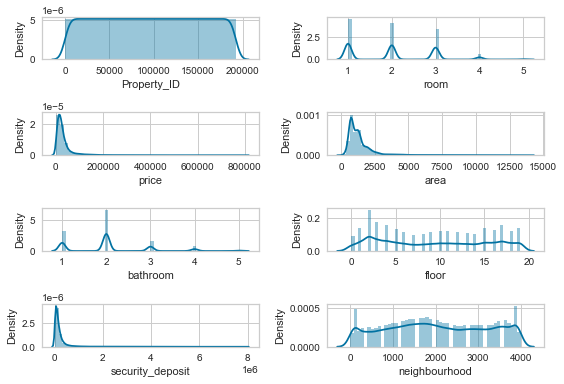

In [123]:
a=4
b=2
c=1
for i in nums.columns:
    plt.subplot(a,b,c)
    sns.distplot(nums.loc[:,i])
    plt.xlabel(i)
    c=c+1
plt.tight_layout()
plt.show()


In [124]:
cat=combined.select_dtypes(include='object')

In [125]:
cat.columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift'],
      dtype='object')

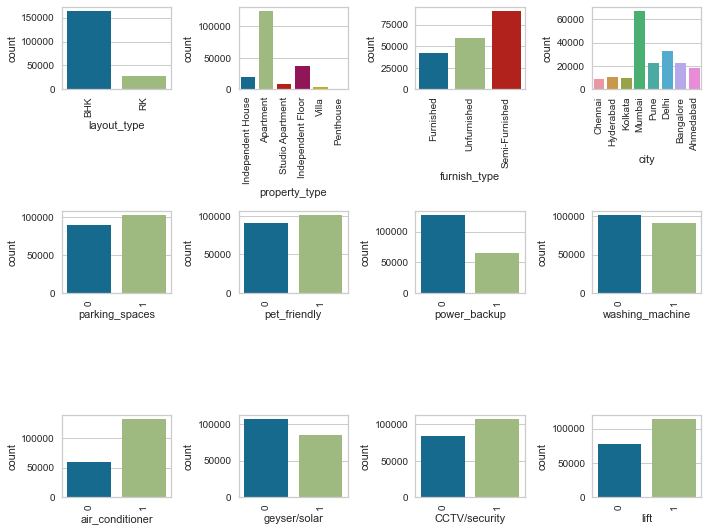

In [126]:
a=4
b=4
c=1
plt.figure(figsize=[10,10])
for i in cat.drop(['locality'],axis=1).columns:
    plt.subplot(a,b,c)
    sns.countplot(cat.loc[:,i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()


In [127]:
# most of the houses are
# have  lift
# have geyser
# have ac followed by an washing machine
# they are pet friendly houses
# they have parking spaces, in mumbai mostly..

## bivariate aanlysis

In [128]:
nums.columns

Index(['Property_ID', 'room', 'price', 'area', 'bathroom', 'floor',
       'security_deposit', 'neighbourhood'],
      dtype='object')

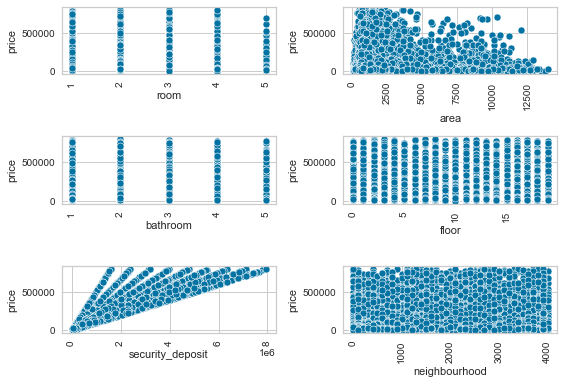

In [129]:
cols=['room','area','bathroom','floor','security_deposit','neighbourhood']
a=3
b=2
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.scatterplot(combined[i],combined['price'])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()


<AxesSubplot:>

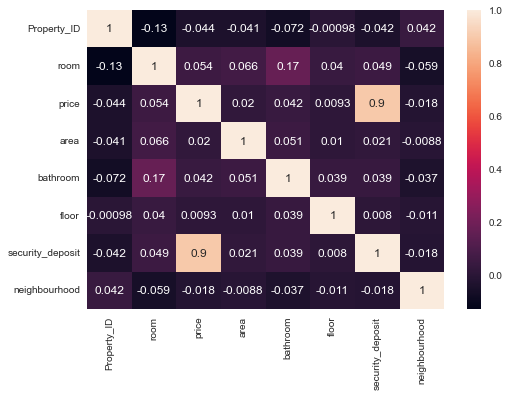

In [130]:
sns.heatmap(nums.corr(),annot=True)

In [131]:
train.loc[:,['security_deposit','price']].describe()

,security_deposit,price
count,1.346830e+05,134683.000000
mean,2.202480e+05,36690.033894
std,4.204503e+05,62620.364025
min,3.180000e+03,1583.000000
25%,5.580250e+04,12035.500000
50%,1.142640e+05,20856.000000
75%,2.207045e+05,36014.000000
max,7.940780e+06,799325.000000


In [132]:
cat.columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift'],
      dtype='object')

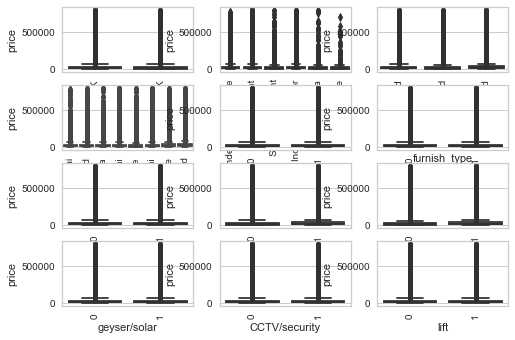

In [133]:
cols=['layout_type', 'property_type', 'furnish_type', 'city',
       'parking_spaces', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']
a=4
b=3
c=1
for i in cols:
    plt.subplot(a,b,c)
    sns.boxplot(combined[i],combined['price'])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    c=c+1
plt.tight_layout()
plt.show()


featuring engineering

In [134]:
combined.head(2)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600


In [135]:
combined.property_type.unique()

array(['Independent House', 'Apartment', 'Studio Apartment',
       'Independent Floor', 'Villa', 'Penthouse'], dtype=object)

In [136]:
# penthouse~apartment
combined.replace(to_replace=['Studio Apartment','Independent Floor'],
                 value=['Apartment','Apartment'],inplace=True)

In [137]:
combined.replace(to_replace='Villa',
                 value='Independent House',inplace=True)

In [138]:
combined.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [139]:
combined.locality.unique()

array(['Palavakkam', 'Manikonda', 'Jodhpur Park', ...,
       'Dhanalakshmi Layout', 'Kalyani Nagar Annexe',
       'Neeladri Investment Layout 6th Main Road'], dtype=object)

In [140]:
combined.city.unique()

array(['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi',
       'Bangalore', 'Ahmedabad'], dtype=object)

In [141]:
north=['Delhi']
west=['Mumbai','Ahmedabad','Pune']
south=['Chennai','Hyderabad','Bangalore']

In [142]:
def meracity(x):
    if x in north:
        return 'north'
    if x in south:
        return 'south'
    if x in west:
        return 'west'

In [143]:
combined['Region']=combined['city'].apply(meracity)

In [144]:
combined.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood', 'Region'],
      dtype='object')

In [145]:
new=combined.drop(['Property_ID','locality','city'],axis=1)

In [146]:
new.head(2)

,room,layout_type,property_type,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,Region
0,3,BHK,Independent House,33624.0,1312,Furnished,2,1,1,1,0,0,1,0,302616,0,0,300,south
1,1,BHK,Apartment,9655.0,1474,Unfurnished,2,0,17,0,1,0,0,1,19310,0,1,1600,south


In [147]:
bhk=train.loc[train.layout_type=='BHK','price']
rk=train.loc[train.layout_type=='RK','price']

In [148]:
stats.ttest_ind(bhk,rk)

Ttest_indResult(statistic=7.382484143859903, pvalue=1.5625315383553e-13)

In [149]:
new[['room','security_deposit']].corr()

,room,security_deposit
room,1.000000,0.048852
security_deposit,0.048852,1.000000


In [150]:
new.furnish_type.unique()

array(['Furnished', 'Unfurnished', 'Semi-Furnished'], dtype=object)

In [151]:
DataFrame(new.groupby('property_type')['furnish_type'].value_counts().T)

furnish_type
property_type     furnish_type                
Apartment         Semi-Furnished         80980
                  Unfurnished            50819
                  Furnished              37324
Independent House Semi-Furnished          9641
                  Unfurnished             8011
                  Furnished               4922
Penthouse         Semi-Furnished           303
                  Unfurnished              257
                  Furnished                148

In [152]:
new=new.drop(['room','floor'],axis=1)

In [153]:
new.columns

Index(['layout_type', 'property_type', 'price', 'area', 'furnish_type',
       'bathroom', 'parking_spaces', 'pet_friendly', 'power_backup',
       'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'Region'],
      dtype='object')

In [154]:
new.shape

(192405, 17)

In [155]:
pd.get_dummies(new,drop_first=True).shape

(192405, 20)

In [156]:
new.columns

Index(['layout_type', 'property_type', 'price', 'area', 'furnish_type',
       'bathroom', 'parking_spaces', 'pet_friendly', 'power_backup',
       'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'Region'],
      dtype='object')

In [157]:
cols=['price', 'area','security_deposit','neighbourhood']
df=train.loc[:,cols]

In [158]:
df

,price,area,security_deposit,neighbourhood
0,33624,1312,302616,300
1,9655,1474,19310,1600
2,23699,1837,118495,3100
3,6306,606,37836,300
4,12008,498,72048,0
...,...,...,...,...
134678,222987,641,1783896,3900
134679,6958,619,62622,1200
134680,85812,2279,429060,3900
134681,15919,1314,79595,2300


In [159]:
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [160]:
model=KMeans(random_state=1)
visuals=KElbowVisualizer(estimator=model,k=(2,10))

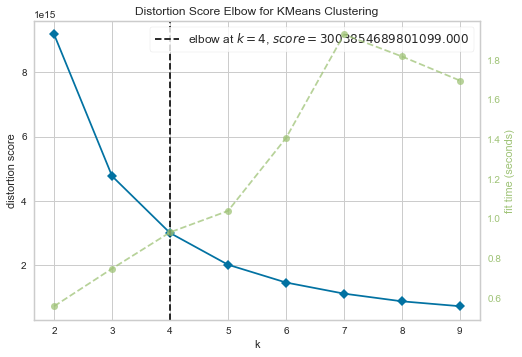

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
visuals.fit(df)
visuals.show()

In [162]:
sc=StandardScaler()
scaled=sc.fit_transform(df)

In [163]:
# dbscan
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors()
model=n.fit(df)
distance,index=model.kneighbors(df)

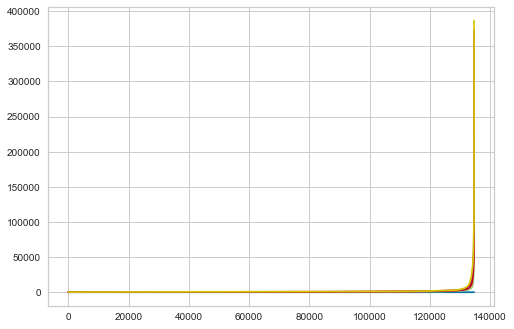

In [164]:
plt.plot(np.sort(distance,axis=0))

In [165]:
dbscan=DBSCAN(eps=1,min_samples=len(df.columns)+1)
dbscan.fit(scaled)

MemoryError: 

In [ ]:
set(dbscan.labels_)

## naumna
* decision tree
* random forest
* gradient boosting

In [166]:
train.shape,test.shape

((134683, 21), (57722, 20))

In [167]:
newtrain=new.loc[0:train.shape[0]-1,:]

In [168]:
newtest=new.loc[train.shape[0]:,:]

In [169]:
# drop the target variable from newtest
newtest=newtest.drop('price',axis=1)

In [170]:
newtest.shape

(57722, 16)

In [171]:
dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [172]:
dummytrain.shape,dummytest.shape,test.shape

((134683, 20), (57722, 19), (57722, 20))

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
x=dummytrain.drop('price',axis=1)
y=dummytrain.price
cross_val_score(estimator=rf,X=x,y=y,cv=5,scoring='neg_mean_squared_error')

array([-8.18461595e+08, -7.70370950e+08, -7.53324027e+08, -8.01619554e+08,
       -7.48214095e+08])

In [174]:
rf=RandomForestRegressor()

pred_rf=rf.fit(x,y).predict(dummytest)

In [175]:
solution=pd.DataFrame({'price':pred_rf})
solution.to_csv('RF Model.csv',index=False) # RMSE

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
pred_gbr=gbr.fit(x,y).predict(dummytest)

solution=pd.DataFrame({'price':pred_gbr})
solution.to_csv('GBR Model.csv',index=False)



In [177]:
! pip3 install lightgbm

In [178]:
import lightgbm as lgbm
light=lgbm.LGBMRegressor()
pred_light=light.fit(x,y).predict(dummytest)

In [179]:
import xgboost as xgb
xgb_r=xgb.XGBRFRegressor()
pred_xgb=xgb_r.fit(x,y).predict(dummytest)

In [181]:
predictions=pd.DataFrame(data=[pred_gbr,pred_light,pred_xgb]).T

In [182]:
predictions=pd.DataFrame({'price':predictions.mean(axis=1)})
solution.to_csv('finalsubmission.csv',index=False)

In [ ]:
# check the properties 